In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
train_2016 = pd.read_csv('https://drive.google.com/uc?id=15GlcdLJ79bc5_WhVNViepQaXvsE1vYb8')
properties_2016 = pd.read_csv('C:/Users/Juhi Singhal/Downloads/properties_2016.csv')

C:\Users\Juhi Singhal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
training_data = pd.merge(train_2016, properties_2016, on=['parcelid'], how='inner')
training_data.shape

(90275, 60)

# Check feature correlations

In [5]:
# Check correlation to logerror
correlations = training_data.drop(['logerror', 'transactiondate'], axis=1).corrwith(training_data['logerror']).sort_values(ascending=False).to_frame('corr')
coverage = (1 - training_data.isnull().sum() / training_data.shape[0]).to_frame('coverage')
correlations.join(coverage)

,corr,coverage
basementsqft,0.253395,0.000476
yardbuildingsqft26,0.086179,0.001052
finishedsquarefeet12,0.041922,0.948169
calculatedfinishedsquarefeet,0.038784,0.992678
finishedsquarefeet6,0.036847,0.004664
finishedsquarefeet13,0.034715,0.000366
threequarterbathnbr,0.034069,0.133027
fireplacecnt,0.033235,0.106419
calculatedbathnbr,0.029448,0.986907
fullbathcnt,0.028845,0.986907


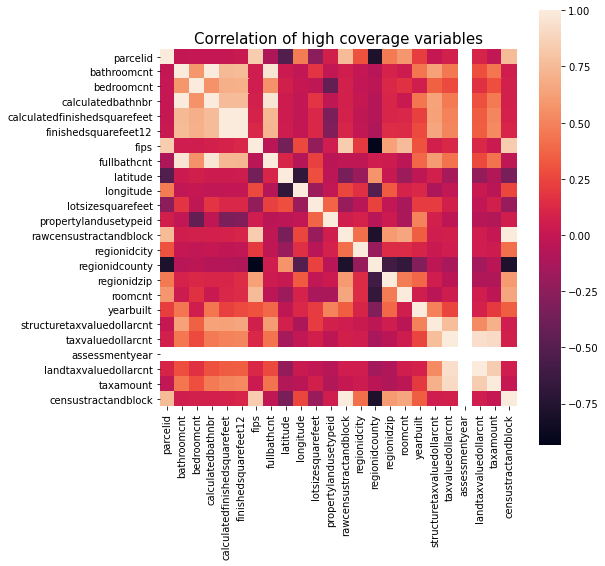

In [6]:
# Check correlation of high coverage features
cols = coverage[coverage.coverage > 0.8].index.tolist()


corrmat = training_data[cols].drop(['logerror', 'transactiondate'], axis=1).corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Correlation of high coverage variables", fontsize=15)
plt.show()


# Check distribution of single features against logerr

<AxesSubplot:xlabel='abs_err', ylabel='Density'>

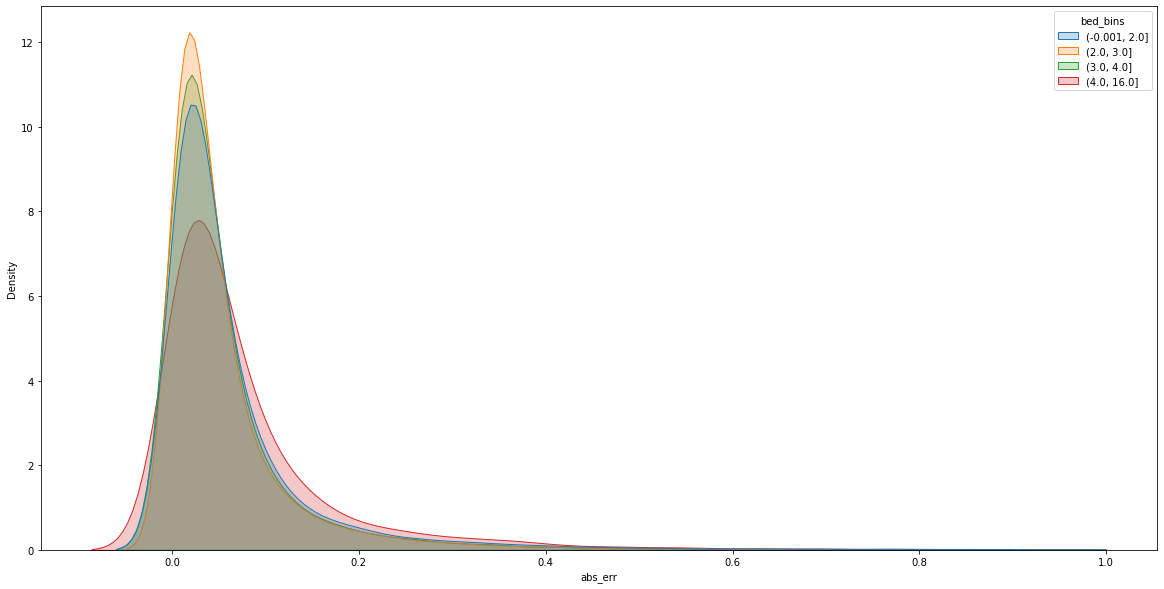

In [7]:
plt.figure(figsize=(20, 10))
sns.kdeplot(
    data=training_data.assign(
        abs_err=np.abs(training_data.logerror),
        bed_bins=pd.qcut(training_data.bedroomcnt, q=4)
    ),
    x='abs_err',
    hue='bed_bins',
    fill=True,
    clip=(-0.1, 1.0),
    common_norm=False
)

C:\Users\Juhi Singhal\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Juhi Singhal\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='abs_err', ylabel='Density'>

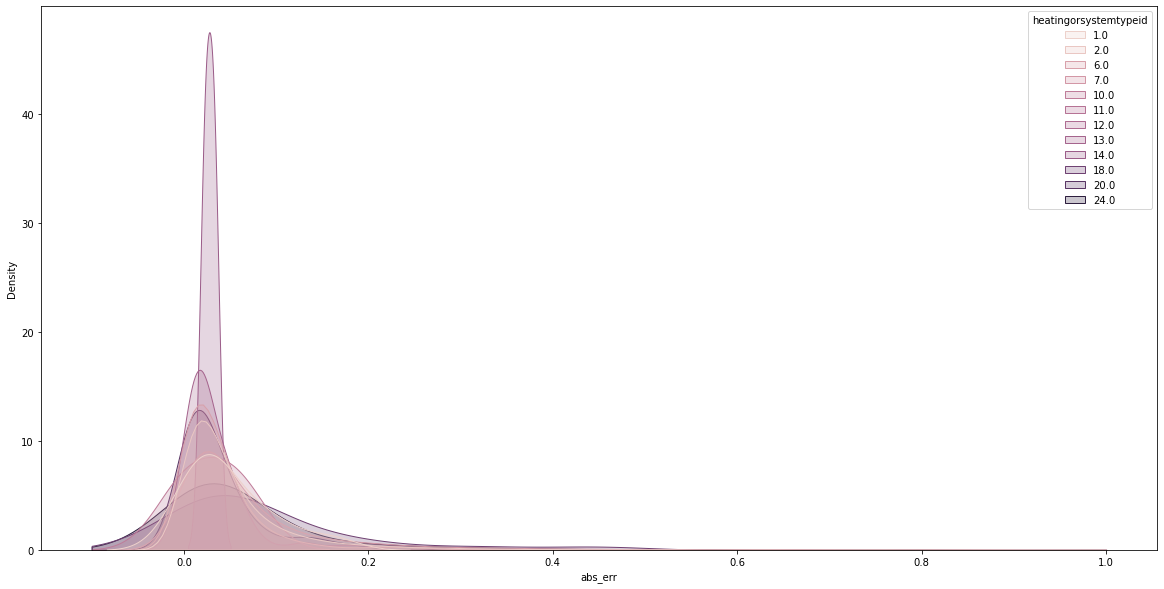

In [8]:
plt.figure(figsize=(20, 10))
sns.kdeplot(
    data=training_data.assign(
        abs_err=np.abs(training_data.logerror)
    ),
    x='abs_err',
    hue='heatingorsystemtypeid',
    fill=True,
    clip=(-0.1, 1.0),
    common_norm=False
)

C:\Users\Juhi Singhal\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='abs_err', ylabel='Density'>

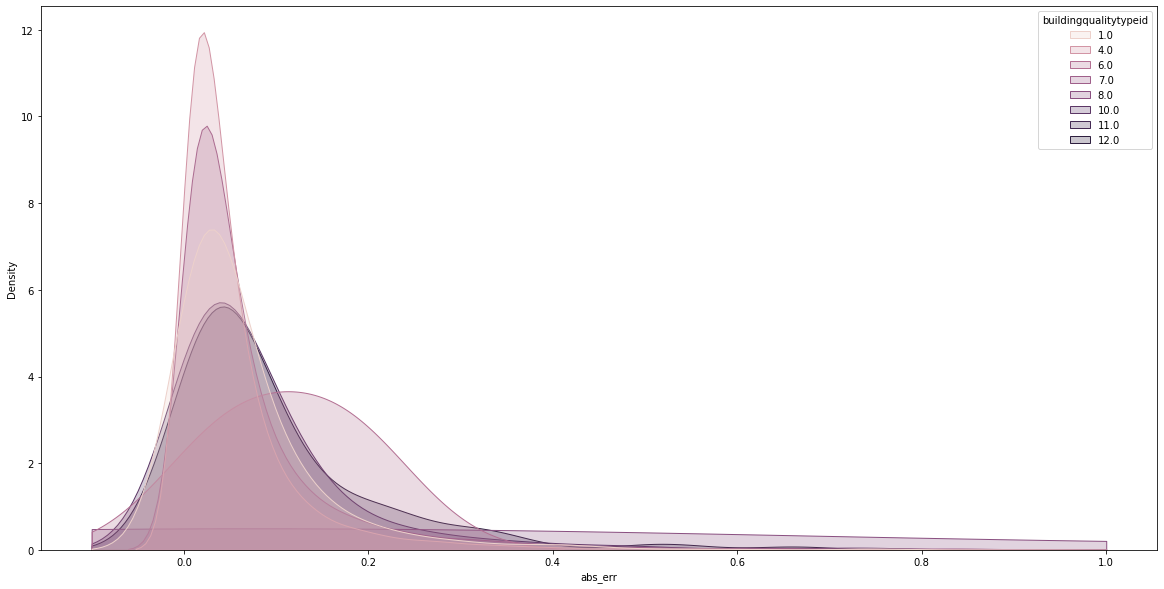

In [9]:
plt.figure(figsize=(20, 10))
sns.kdeplot(
    data=training_data.assign(
        abs_err=np.abs(training_data.logerror)
    ),
    x='abs_err',
    hue='buildingqualitytypeid',
    fill=True,
    clip=(-0.1, 1.0),
    common_norm=False
)

<AxesSubplot:xlabel='abs_err', ylabel='Density'>

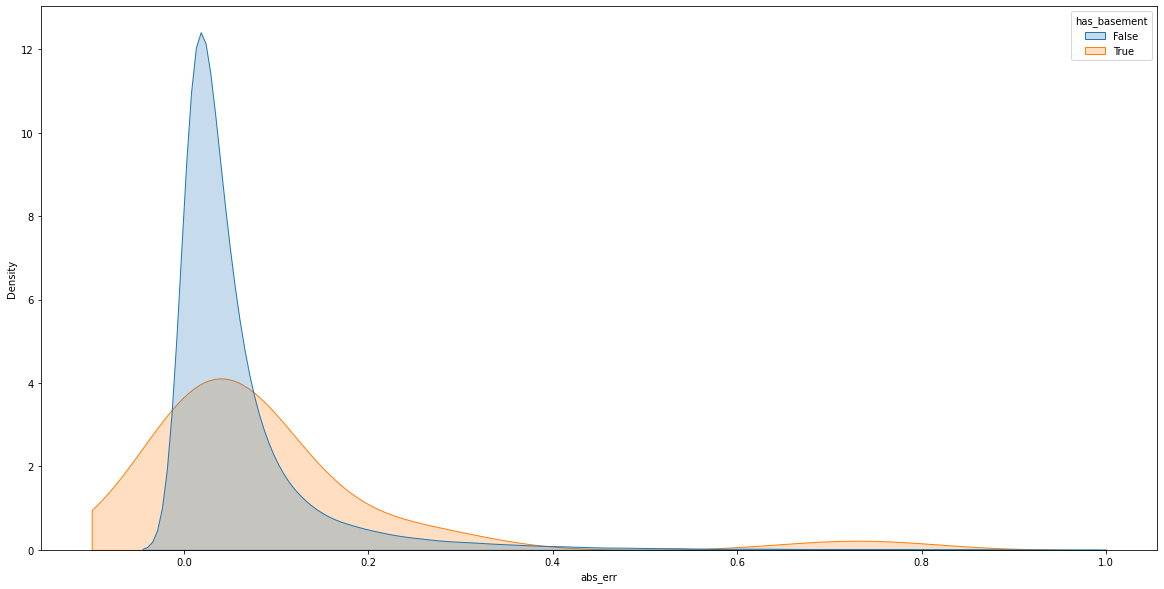

In [10]:
plt.figure(figsize=(20, 10))
sns.kdeplot(
    data=training_data.assign(
        abs_err=np.abs(training_data.logerror),
        has_basement=training_data.basementsqft.notnull()
    ),
    x='abs_err',
    hue='has_basement',
    fill=True,
    clip=(-0.1, 1.0),
    common_norm=False
)

<AxesSubplot:xlabel='abs_err', ylabel='Density'>

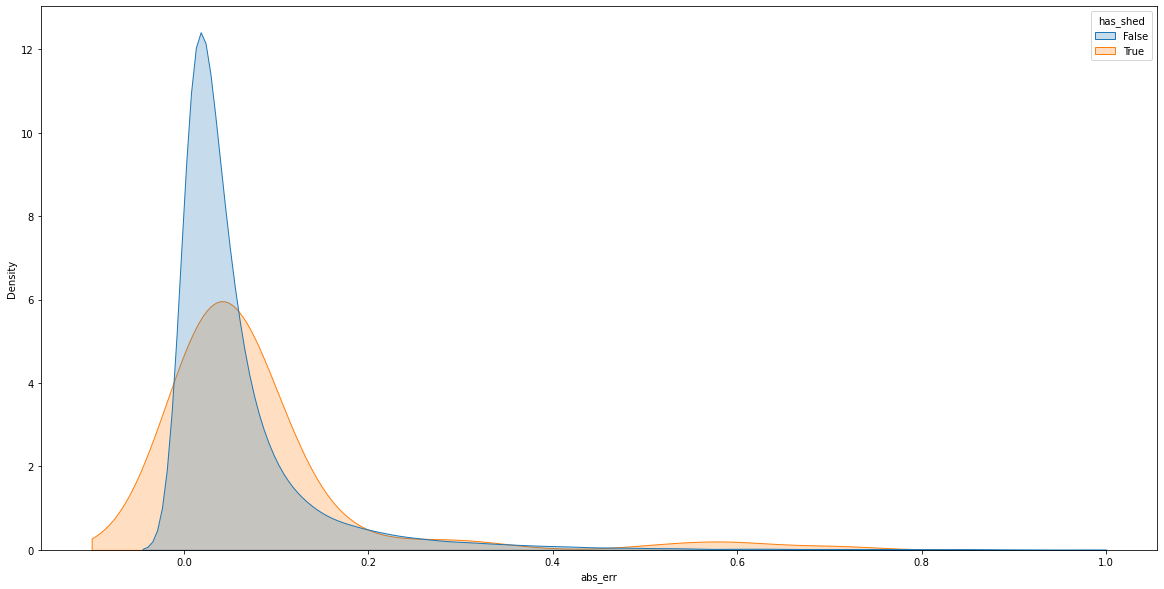

In [11]:
plt.figure(figsize=(20, 10))
sns.kdeplot(
    data=training_data.assign(
        abs_err=np.abs(training_data.logerror),
        has_shed=training_data.yardbuildingsqft26.notnull()
    ),
    x='abs_err',
    hue='has_shed',
    fill=True,
    clip=(-0.1, 1.0),
    common_norm=False
)

<AxesSubplot:xlabel='abs_err', ylabel='Density'>

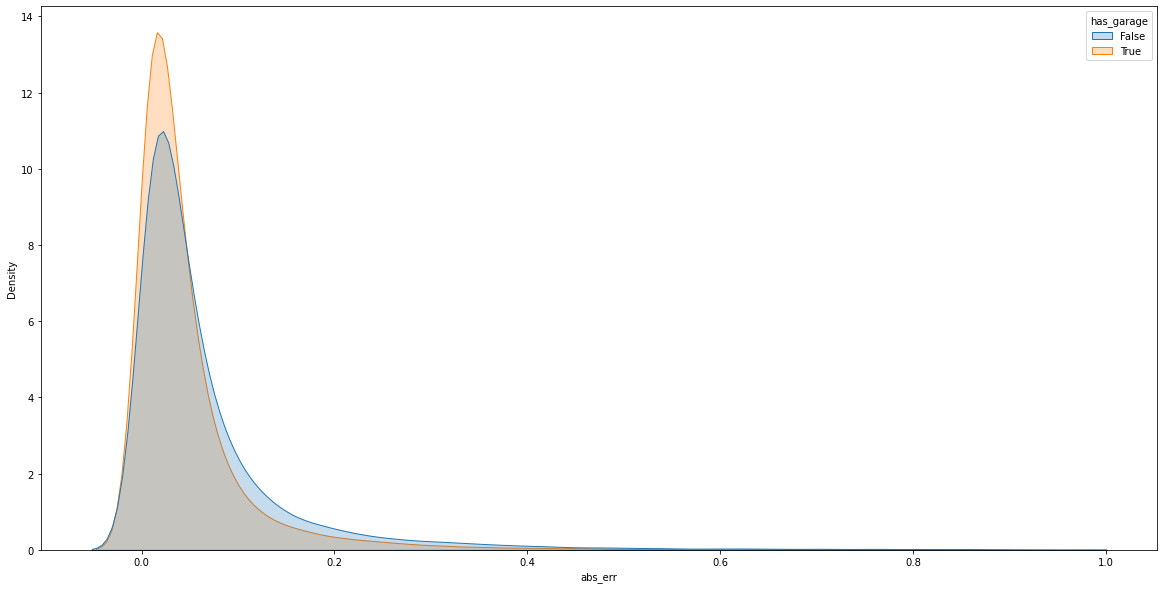

In [12]:
plt.figure(figsize=(20, 10))
sns.kdeplot(
    data=training_data.assign(
        abs_err=np.abs(training_data.logerror),
        has_garage=training_data.garagecarcnt.notnull()
    ),
    x='abs_err',
    hue='has_garage',
    fill=True,
    clip=(-0.1, 1.0),
    common_norm=False
)

# Some feature conclusions
- Having a basement will increase error by a lot, but most homes don't have basements
- 2-4 bedrooms seems to be the sweet spot, when bedrooms are higher or lower things get worse
- For a lot of low coverage features, the presence or absence (i.e. a binary variable) is a pretty important indicator for predicted error